# 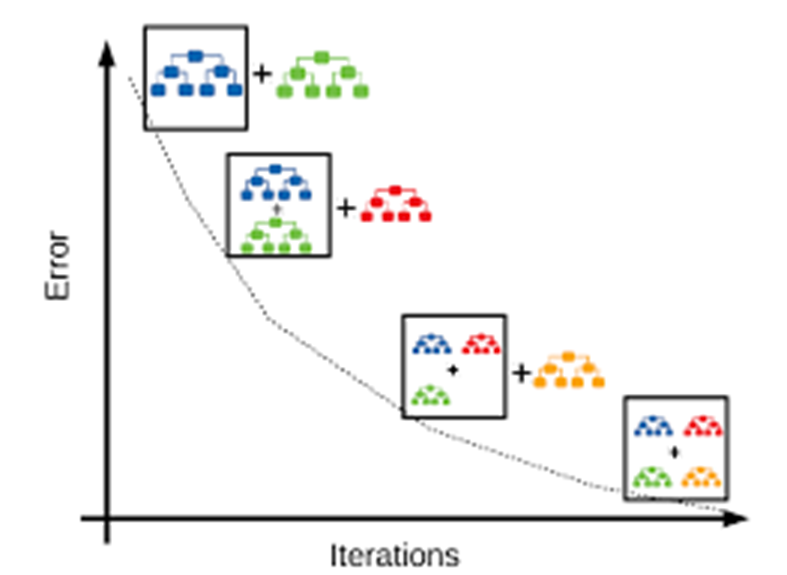

In [45]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the train dataset

In [46]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check missing values in dataframe

In [48]:
m = df.isna().sum()
m

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# Duplicates in dataframe

In [50]:
df.duplicated().sum()

0

# Seperate X and Y(Survived)

In [51]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [52]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [53]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Seperate cat and con features

In [54]:
cat = list(X.columns[X.dtypes=="object"])

In [55]:
con=list(X.columns[X.dtypes!=object])

In [56]:
cat

['Sex', 'Embarked']

In [57]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create a preprocessing pipeline for X

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [59]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [60]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [61]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [62]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [63]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'], dtype=object)

In [64]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [65]:


Y.value_counts()



Survived
0           549
1           342
Name: count, dtype: int64

# Train test split

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [67]:
xtrain.shape

(712, 10)

In [68]:
xtest.shape

(179, 10)

In [69]:
ytrain.value_counts()

Survived
0           444
1           268
Name: count, dtype: int64

In [70]:
ytest.value_counts()

Survived
0           105
1            74
Name: count, dtype: int64

# Create a gradient boosting model

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.001, n_estimators=1, max_depth=2, min_samples_split=5, min_samples_leaf=5)
model.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [72]:
model.score(xtrain, ytrain)

0.6235955056179775

In [73]:
model.score(xtest, ytest)

0.5865921787709497

# Hyperparameter tuning with Randomised search cv

In [74]:
params = {'learning_rate':[0.01, 0.05, 0.1, 0.2],
          'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9, 10]}

In [75]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [76]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 7,
 'max_depth': 2,
 'learning_rate': 0.2}

In [77]:
rscv.best_score_

0.8081948053306407

In [78]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, min_samples_split=7,
                           n_estimators=50)

# Evaluate model performance

In [79]:
best_gbc.score(xtrain, ytrain)

0.8707865168539326

In [80]:
best_gbc.score(xtest, ytest)

0.8100558659217877

# Predict train and test results

In [81]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [82]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [83]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [84]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [85]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


# Check the confusion matrix

In [86]:
c = best_gbc.classes_
c

array([0, 1], dtype=int64)

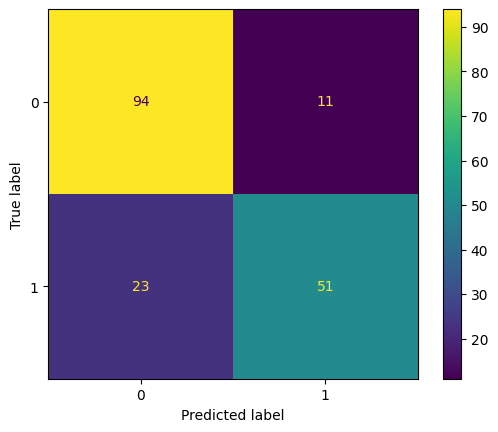

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

# Check classification report

In [88]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# Prediction on out of sample data

In [92]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [91]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked'])])

# apply pre.transform on out of sample data

In [94]:
xnew_pre = pre.transform(xnew)
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  1.        ,
         0.        ,  0.        ]])

In [95]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


# Predict the results

In [96]:
preds = best_gbc.predict(xnew_pre)
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [97]:
prob = best_gbc.predict_proba(xnew_pre)[:,1]
prob[0:5]

array([0.12468632, 0.59951018, 0.18092826, 0.1241841 , 0.50044295])

# Save above results in dataframe

In [98]:
df_final = xnew[['PassengerId']]
df_final


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [99]:
df_final['Survived_pred'] = preds 
df_final['Survived_prob'] = prob

In [100]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.124686
1,893,1,0.599510
2,894,0,0.180928
3,895,0,0.124184
4,896,1,0.500443
...,...,...,...
413,1305,0,0.124184
414,1306,1,0.954370
415,1307,0,0.094642
416,1308,0,0.124184


In [101]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    285
1    133
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for Survived_pred'}, xlabel='Survived_pred'>

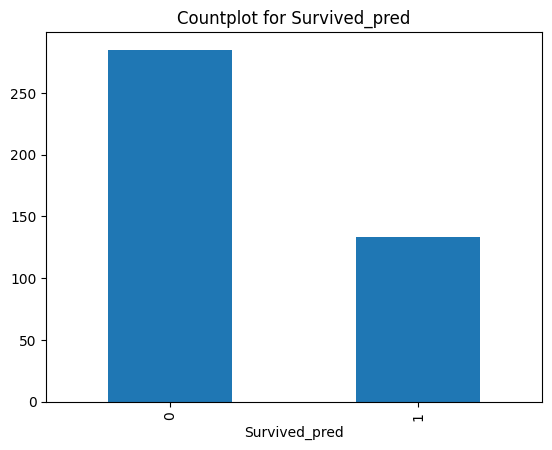

In [102]:
df_final['Survived_pred'].value_counts().plot(kind='bar', title='Countplot for Survived_pred')

# Save above results to csv

In [103]:
df_final.to_csv('Results.csv', index=False)

# Check feature importances

In [104]:
imp = best_gbc.feature_importances_
imp

array([0.17450212, 0.12571248, 0.03114519, 0.01281729, 0.09698643,
       0.34356353, 0.20333155, 0.00406605, 0.        , 0.00787536])

In [105]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [106]:
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

cat__Sex_female    0.343564
cat__Sex_male      0.203332
num__Pclass        0.174502
num__Age           0.125712
num__Fare          0.096986
num__SibSp         0.031145
num__Parch         0.012817
cat__Embarked_S    0.007875
cat__Embarked_C    0.004066
cat__Embarked_Q    0.000000
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

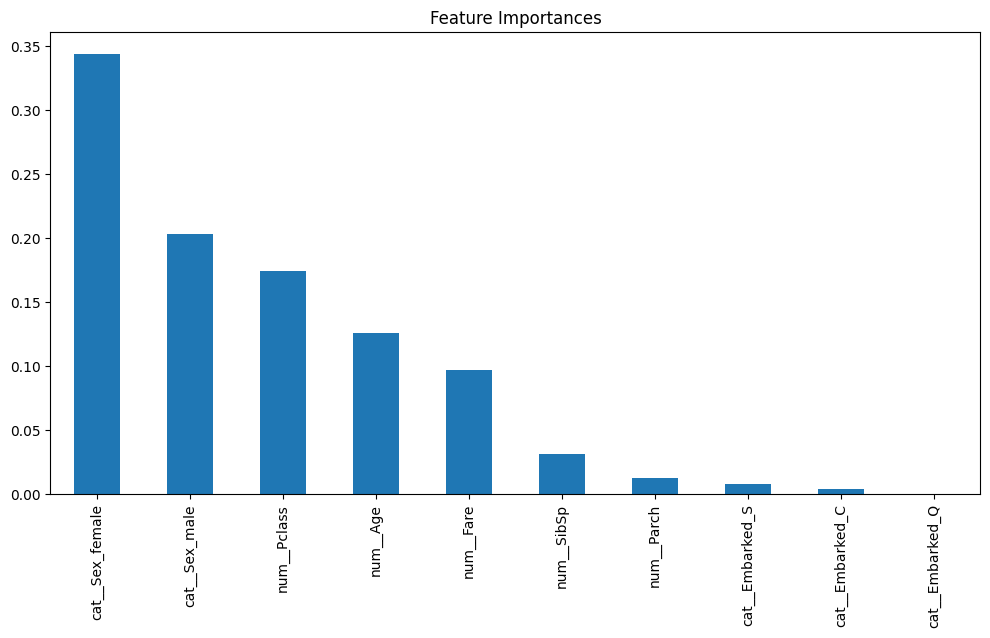

In [107]:
imp.plot(kind='bar', title='Feature Importances', figsize=(12, 6))